***Artificial Intelligence - Assigment No.2 - Supervised Learning***


**About the Dataset**

The dataset that we are going to use in this project is the "BCCC-cPacket-Cloud-DDoS-2024", a cybersecurity dataset to train, test and analyze cybersecurity models. It includes an equal number of malicious and benign DoH(Domain Over HTTP) network traffic instances, with 249,836 instances in each category. It has 28 attributes, all of them being numeric-valued measurements, regarding the packets length, response time, byte flow, etc. And the last one, Label, which labels the packet as Benign or Malicious.

**About the Problem**

Domain Name System is one of the earliest and most vulnerable network protocols, having several security loopholes. Because of that, it has always been an area of great concern for cybersecurity researches. To overcome some of the DoH problems and vulnerabilities, our model will help us undestand in a better/deeper way what makes a packet benign or malicious. So this is a binary classification problem where the target variable is the label of benign or malicious being applied to a DoH packet.

**About the Solution**

The solution to this problem was a supervised learning model, we split the above mentioned dataset into a training part
(70%) and a testing part(30%). The model will be evaluated using the x1, x2, x3 metrics.


**Importing Libraries**

To start, we need to install all the libraries that are going to be used in this project. They are all located in the "requirements.txt" file and can be easily installed with the command below:

	pip install -r requirements.txt

In [1]:
import os
import sys
import math
#!{sys.executable} -m pip install numpy
import numpy as np
#!{sys.executable} -m pip install pandas
import pandas as pd
#!{sys.executable} -m pip install matplotlib
import matplotlib.pyplot as plt
#!{sys.executable} -m pip install seaborn
import seaborn as sb
#!{sys.executable} -m pip install scikit-learn
from sklearn import svm
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
import time

**Loading the dataset with pandas module**

In [2]:
df = pd.read_csv('archive\\BCCC-CIRA-CIC-DoHBrw-2020.csv')
df.head()

,FlowBytesSent,FlowSentRate,FlowBytesReceived,FlowReceivedRate,PacketLengthVariance,PacketLengthStandardDeviation,PacketLengthMean,PacketLengthMedian,PacketLengthMode,PacketLengthSkewFromMedian,...,PacketTimeCoefficientofVariation,ResponseTimeTimeVariance,ResponseTimeTimeStandardDeviation,ResponseTimeTimeMean,ResponseTimeTimeMedian,ResponseTimeTimeMode,ResponseTimeTimeSkewFromMedian,ResponseTimeTimeSkewFromMode,ResponseTimeTimeCoefficientofVariation,Label
0,353,80.890348,393,90.056393,469.209877,21.661253,82.888889,66.0,66,2.339046,...,0.534524,1.754601e-09,0.000042,0.000048,0.000019,0.000017,2.028699,0.737490,0.869641,Benign
1,1807,53.056709,4828,141.758602,145520.370987,381.471324,228.793103,76.0,68,1.201609,...,1.591559,5.348911e-05,0.007314,0.011523,0.015273,0.000016,-1.538407,1.573304,0.634722,Malicious
2,15000,479.536009,27719,886.150575,25949.480963,161.088426,135.186709,87.0,87,0.897396,...,0.670950,3.356292e-01,0.579335,0.139518,0.001976,0.000003,0.712241,0.240819,4.152404,Malicious
3,1755,58.193065,4617,153.125406,154088.445853,392.541007,245.112953,75.5,54,1.296268,...,2.029971,1.245935e+02,11.162146,5.011613,0.015778,0.012884,1.342708,0.447829,2.227258,Benign
4,618,3.491495,315,1.779646,319.410000,17.872045,93.300000,105.0,105,-1.963961,...,0.816362,2.975575e-09,0.000054,0.015507,0.015471,0.015466,1.986391,0.751146,0.003502,Benign


**Data Preprocessing**

Before applying our data to the algorithm, we must first check if there is any transformations we can do to make our dataset cleaner and more optimized. First of, we are going to check if there is any entry in the dataset that contains a null value in any of the attributes.

In [28]:
# Checking for NA values, that is, missing/empty values.
df.isna().sum() 

FlowBytesSent                             0
FlowSentRate                              0
FlowBytesReceived                         0
FlowReceivedRate                          0
PacketLengthVariance                      0
PacketLengthStandardDeviation             0
PacketLengthMean                          0
PacketLengthMedian                        0
PacketLengthMode                          0
PacketLengthSkewFromMedian                0
PacketLengthSkewFromMode                  0
PacketLengthCoefficientofVariation        0
PacketTimeVariance                        0
PacketTimeStandardDeviation               0
PacketTimeMean                            0
PacketTimeMedian                          0
PacketTimeMode                            0
PacketTimeSkewFromMedian                  0
PacketTimeSkewFromMode                    0
PacketTimeCoefficientofVariation          0
ResponseTimeTimeVariance                  0
ResponseTimeTimeStandardDeviation         0
ResponseTimeTimeMean            

As we can see, no missing values were found.

**Data analysis**

In order to get an overview of our dataset and check for any outliers, we are going to use df.dataset().

In [5]:
df.describe()

,FlowBytesSent,FlowSentRate,FlowBytesReceived,FlowReceivedRate,PacketLengthVariance,PacketLengthStandardDeviation,PacketLengthMean,PacketLengthMedian,PacketLengthMode,PacketLengthSkewFromMedian,...,PacketTimeSkewFromMode,PacketTimeCoefficientofVariation,ResponseTimeTimeVariance,ResponseTimeTimeStandardDeviation,ResponseTimeTimeMean,ResponseTimeTimeMedian,ResponseTimeTimeMode,ResponseTimeTimeSkewFromMedian,ResponseTimeTimeSkewFromMode,ResponseTimeTimeCoefficientofVariation
count,4.991060e+05,4.991060e+05,4.991060e+05,4.991060e+05,4.991060e+05,499106.000000,499106.000000,499106.000000,499106.000000,499106.000000,...,499106.000000,499106.000000,499106.000000,499106.000000,499106.000000,499106.000000,499106.000000,499106.000000,499106.000000,499106.000000
mean,4.020093e+04,4.733915e+04,4.250156e+04,3.166829e+04,9.263585e+04,220.169083,173.159814,95.472702,70.749953,0.442934,...,1.246052,0.972995,1.711825,0.319586,0.442021,0.394671,0.205894,-0.968984,-0.060800,1.114611
std,1.439617e+05,4.212751e+05,1.393927e+05,2.566805e+05,1.534938e+05,210.141825,85.506490,32.999740,14.830277,1.551998,...,0.713803,0.520212,11.106412,1.244031,2.071807,2.351233,1.724873,3.163775,3.198770,1.735820
min,5.500000e+01,1.464903e+00,5.400000e+01,1.576245e+00,0.000000e+00,0.000000,56.000000,54.000000,54.000000,-10.000000,...,-5.265523,0.077182,0.000000,0.000000,0.000005,0.000002,-0.000001,-10.000000,-10.000000,0.000000
25%,6.180000e+02,5.410781e+01,4.760000e+02,1.418128e+02,4.692099e+02,21.661253,92.000000,76.000000,66.000000,0.199848,...,0.627988,0.577836,0.000021,0.004454,0.010538,0.012238,0.000016,-1.797168,0.393686,0.552687
50%,1.807000e+03,3.640969e+02,4.827000e+03,4.611146e+02,1.826789e+04,135.142971,152.488283,87.000000,68.000000,0.986397,...,1.224949,0.748184,0.000079,0.008820,0.015148,0.015407,0.000034,0.000000,0.908002,0.800649
75%,5.542000e+03,3.810260e+03,7.888000e+03,4.215498e+03,1.415989e+05,376.296309,228.758621,105.000000,68.000000,1.201609,...,1.716577,1.516263,0.000357,0.018640,0.024903,0.016300,0.015161,0.936908,1.305393,1.208105
max,8.015359e+06,2.304348e+07,7.723184e+06,7.600000e+06,1.578115e+06,1256.230616,689.800000,317.000000,553.000000,2.932375,...,12.956406,5.616085,647.245330,25.441017,28.017596,28.017596,28.017596,2.970716,5.428781,66.309747


After carefully observing this table, we can see that certain attributes such as the PacketLengthStandardDeviation, PacketLengthSkewFromMedian, ResponseTimeTimeVariance and ResponseTimeTimeSkewFromMedian may have outliers, due to their standard deviation (std) value. To better check for outliers, we can can use boxplots for some of the attributes that seem to have outliers

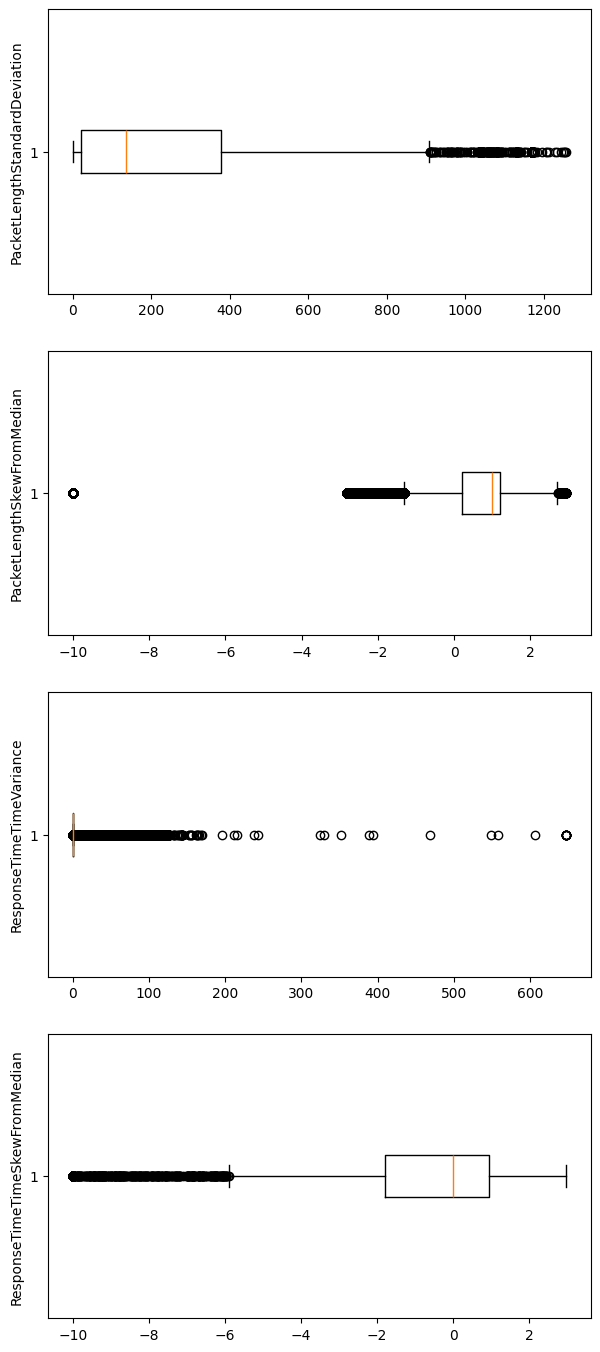

In [21]:
# Box Plots
fig, axs = plt.subplots(4,1,dpi=100, figsize=(7,17))
i = 0
for col in df.columns:
    if (col == "PacketLengthStandardDeviation" or col == "PacketLengthSkewFromMedian" or col == "ResponseTimeTimeVariance" or col == "ResponseTimeTimeSkewFromMedian"):
        axs[i].boxplot(df[col], vert=False)
        axs[i].set_ylabel(col)
        i+=1
plt.show()

In these cases, we can verify that the attributes have a very inconsistent set of values, resulting in a large number of outliers. That might be related to the size of our dataset.

**Discretization**

In order to do certain operations on a dataset, we must make sure that every attribute is ordinal. However, our dataset contains an atribute "Label", which is not ordinal. Because of that, we have to encode both "Benign" and "Malicious" to an ordinal value.

In [4]:
encoder = LabelEncoder()

df['Label'] = encoder.fit_transform(df['Label'])
df.head()

,FlowBytesSent,FlowSentRate,FlowBytesReceived,FlowReceivedRate,PacketLengthVariance,PacketLengthStandardDeviation,PacketLengthMean,PacketLengthMedian,PacketLengthMode,PacketLengthSkewFromMedian,...,PacketTimeCoefficientofVariation,ResponseTimeTimeVariance,ResponseTimeTimeStandardDeviation,ResponseTimeTimeMean,ResponseTimeTimeMedian,ResponseTimeTimeMode,ResponseTimeTimeSkewFromMedian,ResponseTimeTimeSkewFromMode,ResponseTimeTimeCoefficientofVariation,Label
0,353,80.890348,393,90.056393,469.209877,21.661253,82.888889,66.0,66,2.339046,...,0.534524,1.754601e-09,0.000042,0.000048,0.000019,0.000017,2.028699,0.737490,0.869641,0
1,1807,53.056709,4828,141.758602,145520.370987,381.471324,228.793103,76.0,68,1.201609,...,1.591559,5.348911e-05,0.007314,0.011523,0.015273,0.000016,-1.538407,1.573304,0.634722,1
2,15000,479.536009,27719,886.150575,25949.480963,161.088426,135.186709,87.0,87,0.897396,...,0.670950,3.356292e-01,0.579335,0.139518,0.001976,0.000003,0.712241,0.240819,4.152404,1
3,1755,58.193065,4617,153.125406,154088.445853,392.541007,245.112953,75.5,54,1.296268,...,2.029971,1.245935e+02,11.162146,5.011613,0.015778,0.012884,1.342708,0.447829,2.227258,0
4,618,3.491495,315,1.779646,319.410000,17.872045,93.300000,105.0,105,-1.963961,...,0.816362,2.975575e-09,0.000054,0.015507,0.015471,0.015466,1.986391,0.751146,0.003502,0


By encoding the label values, we now have "Malicious" mapped to 1, and "Benign" mapped to 0.

**Correlated attributes**

Currently our dataset has 28 attributes. We want to optimize it so that we can use it more efectively during the model training. To achieve that, we can find attributes that have a high correlation between themselves, since they could be merged into a single attribute. By checking every pair of columns and verifying if they have a correlation above 95%, we can infer if our dataset contains any highly correlated attributes.

In [7]:
df_copy = df.copy()
cols = list(df_copy.columns)

feature_cols = 0

corr_attr = []

for i, col1 in enumerate(cols):
    for col2 in cols[i::]:
        if col1 == col2:
            continue
        if math.fabs(df_copy[col1].corr(df_copy[col2])) > 0.95:
            feature_cols += 1
            corr_attr.append([col1, col2])
            
print(f'Found {feature_cols} highly correlated attributes!')
for j in corr_attr:
    print(j)

Found 3 highly correlated attributes!
['FlowSentRate', 'FlowReceivedRate']
['PacketTimeMean', 'PacketTimeMedian']
['ResponseTimeTimeMean', 'ResponseTimeTimeMedian']


As we can see from the result of the code above, our dataset has three highly correlated attributes. Those are: `FlowSentRate - FlowReceivedRate`, `PacketTimeMean - PacketTimeMedian`, and `ResponseTimeTimeMean - ResponseTimeTimeMedian`.

To better observe these correlations, we can build scatter plots. If both attributes are highly correlated, then the plot should display a straight line.

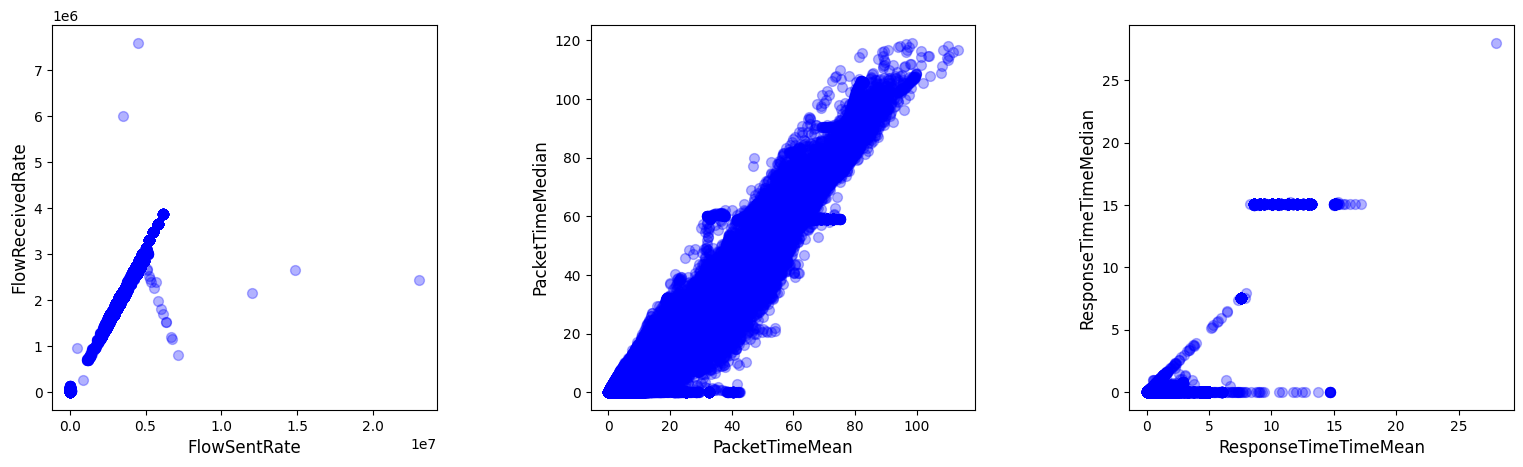

In [16]:
plt.figure(figsize=(25,25))
plt.subplots_adjust(left=0.1,bottom=0.1,right=0.9,top=0.9,wspace=0.4,hspace=0.4)

for i, cols in enumerate(corr_attr):
    plt.subplot(4,4,i+1)
    plt.scatter(df[cols[0]],df[cols[1]],s=50,c='blue',alpha=0.3)
    plt.xlabel(f"{cols[0]}",fontsize=12)
    plt.ylabel(f"{cols[1]}",fontsize=12)

From looking at these scatter plots we can observe that these pairs of attributes are in fact highly correlated.